In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Define dataset paths
train_dir = 'Npd/New Plant Diseases Dataset(Augmented)/train'
valid_dir = 'Npd/New Plant Diseases Dataset(Augmented)/valid'

In [3]:
# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values to [0, 1]
    rotation_range=20,          # Randomly rotate images
    width_shift_range=0.2,      # Randomly shift images horizontally
    height_shift_range=0.2,     # Randomly shift images vertically
    shear_range=0.2,            # Randomly apply shearing
    zoom_range=0.2,             # Randomly zoom into images
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='nearest'         # Fill missing pixels with the nearest value
)

# Preprocessing for validation (only rescaling)
valid_datagen = ImageDataGenerator(
    rescale=1./255              # Normalize pixel values to [0, 1]
)



# Load the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),  # Dropout to reduce overfitting
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),  # Increased dropout for deeper layers
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Final dropout before the output layer
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[early_stopping]
)

# Save the model
model.save('plant_disease_model.h5')

# Evaluate the model
loss, accuracy = model.evaluate(valid_generator)
print(f'Validation Accuracy: {accuracy*100:.2f}%')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.1203 - loss: 3.2190

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 854s 388ms/step - accuracy: 0.1203 - loss: 3.2187 - val_accuracy: 0.5647 - val_loss: 1.4675
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 450s 205ms/step - accuracy: 0.4450 - loss: 1.8247 - val_accuracy: 0.7336 - val_loss: 0.8793
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 447s 203ms/step - accuracy: 0.5718 - loss: 1.3908 - val_accuracy: 0.7878 - val_loss: 0.6832
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 436s 198ms/step - accuracy: 0.6493 - loss: 1.1261 - val_accuracy: 0.7846 - val_loss: 0.6920
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 442s 201ms/step - accuracy: 0.6977 - loss: 0.9595 - val_accuracy: 0.8566 - val_loss: 0.4658
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 436s 199ms/step - accuracy: 0.7348 - loss: 0.8472 - val_accuracy: 0.8712 - val_loss: 0.4175
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 436s 199ms/step - accuracy: 0.7576 - loss: 0.7846 - val_accuracy: 0.8866 - val_loss: 0.3568
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 436s 198ms/step - accuracy: 0.7

550/550 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.9118 - loss: 0.2905
Validation Accuracy: 91.10%


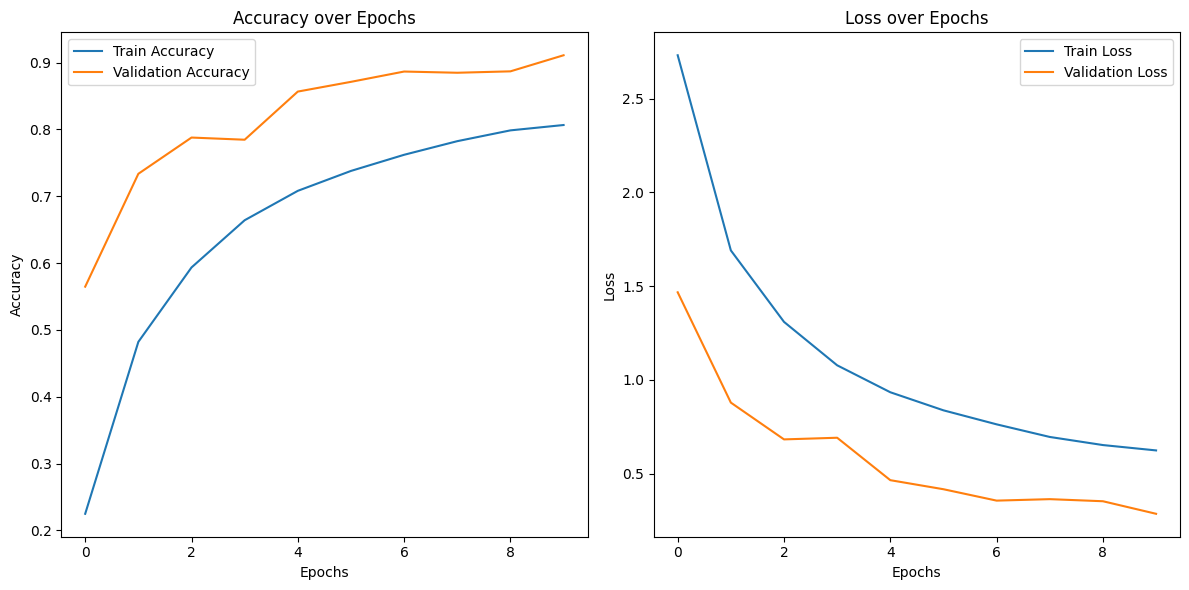

In [4]:
import matplotlib.pyplot as plt


# Plotting Training & Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training & Validation Loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [5]:
test_dir ='/test/test'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


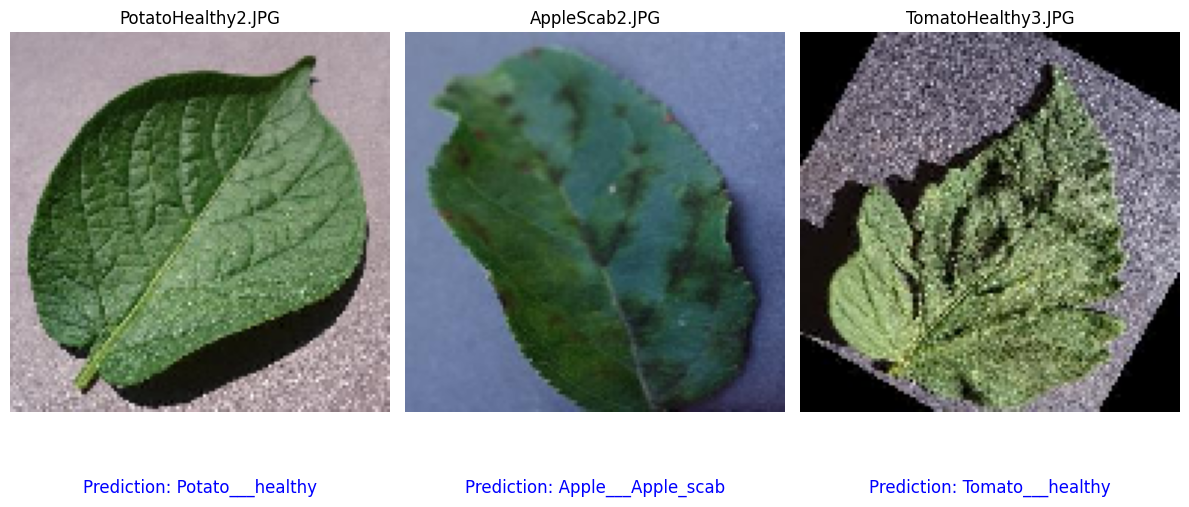

In [6]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Define the test directory
test_dir = 'test/test'

# List all images in the test directory
all_images = [f for f in os.listdir(test_dir) if f.endswith('.JPG')]

# Randomly select 3 images from the test directory
random_images = random.sample(all_images, 3)

# Preprocess the images and predict using the trained model
plt.figure(figsize=(12, 6))

for i, img_name in enumerate(random_images):
    # Load and preprocess the image
    img_path = os.path.join(test_dir, img_name)
    img = image.load_img(img_path, target_size=(128, 128))  # Resize to match the input size of the model
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values
    
    # Predict the class using the trained model
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    # Get the class label from the class index
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]
    
    # Plot the image
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(img_name, fontsize=12)  # Display image name above the image
    plt.axis('off')  # Hide axes
    
    # Add prediction text below the image
    plt.text(0.5, -0.2, f'Prediction: {predicted_label}', ha='center', va='center', 
             transform=plt.gca().transAxes, fontsize=12, color='blue')

plt.tight_layout()
plt.show()

Other models

In [7]:
# Import necessary libraries for transfer learning
from tensorflow.keras.applications import NASNetMobile, MobileNet, EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [8]:
# Define the input shape
input_shape = (128, 128, 3)

# Function to create a model based on a pre-trained backbone
def create_transfer_learning_model(base_model):
    base_model.trainable = False  # Freeze the base model

    # Add custom layers on top
    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)  # Dropout layer
    outputs = Dense(train_generator.num_classes, activation='softmax')(x)
    # Create the model
    model = Model(inputs, outputs)
    return model


In [9]:
# Load pre-trained models and create custom models
nasnet_base = NASNetMobile(include_top=False, weights='imagenet', input_shape=input_shape)
mobilenet_base = MobileNet(include_top=False, weights='imagenet', input_shape=input_shape)
efficientnet_base = EfficientNetB0(include_top=False, weights='imagenet', input_shape=input_shape)

In [10]:
# Create models
models = {
    'NASNet': create_transfer_learning_model(nasnet_base),
    'MobileNet': create_transfer_learning_model(mobilenet_base),
    'EfficientNet': create_transfer_learning_model(efficientnet_base)
}

In [11]:
# Compile and train each model
history_dict = {}
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
for model_name, model in models.items():
    print(f"\nTraining model: {model_name}\n")
    
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train the model
    history = model.fit(
        train_generator,
        validation_data=valid_generator,
        epochs=10,
        callbacks=[early_stopping]
    )

    # Save the model and training history
    model.save(f'{model_name.lower()}_plant_disease_model.h5')
    history_dict[model_name] = history

    # Evaluate the model
    loss, accuracy = model.evaluate(valid_generator)
    print(f"Validation Accuracy for {model_name}: {accuracy*100:.2f}%")


Training model: NASNet

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 421s 186ms/step - accuracy: 0.4311 - loss: 2.0448 - val_accuracy: 0.7410 - val_loss: 0.8797
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 404s 184ms/step - accuracy: 0.6610 - loss: 1.0960 - val_accuracy: 0.7684 - val_loss: 0.7538
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 402s 183ms/step - accuracy: 0.6886 - loss: 1.0022 - val_accuracy: 0.7774 - val_loss: 0.7170
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 402s 183ms/step - accuracy: 0.7044 - loss: 0.9656 - val_accuracy: 0.7847 - val_loss: 0.6804
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 403s 183ms/step - accuracy: 0.7122 - loss: 0.9301 - val_accuracy: 0.7923 - val_loss: 0.6562
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 403s 183ms/step - accuracy: 0.7213 - loss: 0.8972 - val_accuracy: 0.7956 - val_loss: 0.6412
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 402s 183ms/step - accuracy: 0.7214 - loss: 0.8838 - val_accuracy: 0.8026 - val_loss: 0.6129
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━

550/550 ━━━━━━━━━━━━━━━━━━━━ 55s 100ms/step - accuracy: 0.8116 - loss: 0.5898
Validation Accuracy for NASNet: 81.02%

Training model: MobileNet

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 370s 168ms/step - accuracy: 0.5499 - loss: 1.5873 - val_accuracy: 0.8971 - val_loss: 0.3134
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 367s 167ms/step - accuracy: 0.7987 - loss: 0.6248 - val_accuracy: 0.9004 - val_loss: 0.3012
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 365s 166ms/step - accuracy: 0.8245 - loss: 0.5505 - val_accuracy: 0.9175 - val_loss: 0.2424
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 367s 167ms/step - accuracy: 0.8348 - loss: 0.5110 - val_accuracy: 0.9238 - val_loss: 0.2178
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 364s 166ms/step - accuracy: 0.8410 - loss: 0.4894 - val_accuracy: 0.9225 - val_loss: 0.2300
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 364s 166ms/step - accuracy: 0.8469 - loss: 0.4746 - val_accuracy: 0.9244 - val_loss: 0.2155
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 365s 166m

550/550 ━━━━━━━━━━━━━━━━━━━━ 48s 87ms/step - accuracy: 0.9358 - loss: 0.1940
Validation Accuracy for MobileNet: 93.46%

Training model: EfficientNet

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 466s 209ms/step - accuracy: 0.0282 - loss: 3.6405 - val_accuracy: 0.0286 - val_loss: 3.6361
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 455s 207ms/step - accuracy: 0.0277 - loss: 3.6367 - val_accuracy: 0.0287 - val_loss: 3.6360
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 455s 207ms/step - accuracy: 0.0293 - loss: 3.6364 - val_accuracy: 0.0287 - val_loss: 3.6360
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 455s 207ms/step - accuracy: 0.0277 - loss: 3.6362 - val_accuracy: 0.0287 - val_loss: 3.6361
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 454s 207ms/step - accuracy: 0.0275 - loss: 3.6362 - val_accuracy: 0.0286 - val_loss: 3.6361


550/550 ━━━━━━━━━━━━━━━━━━━━ 72s 130ms/step - accuracy: 0.0284 - loss: 3.6357
Validation Accuracy for EfficientNet: 2.86%


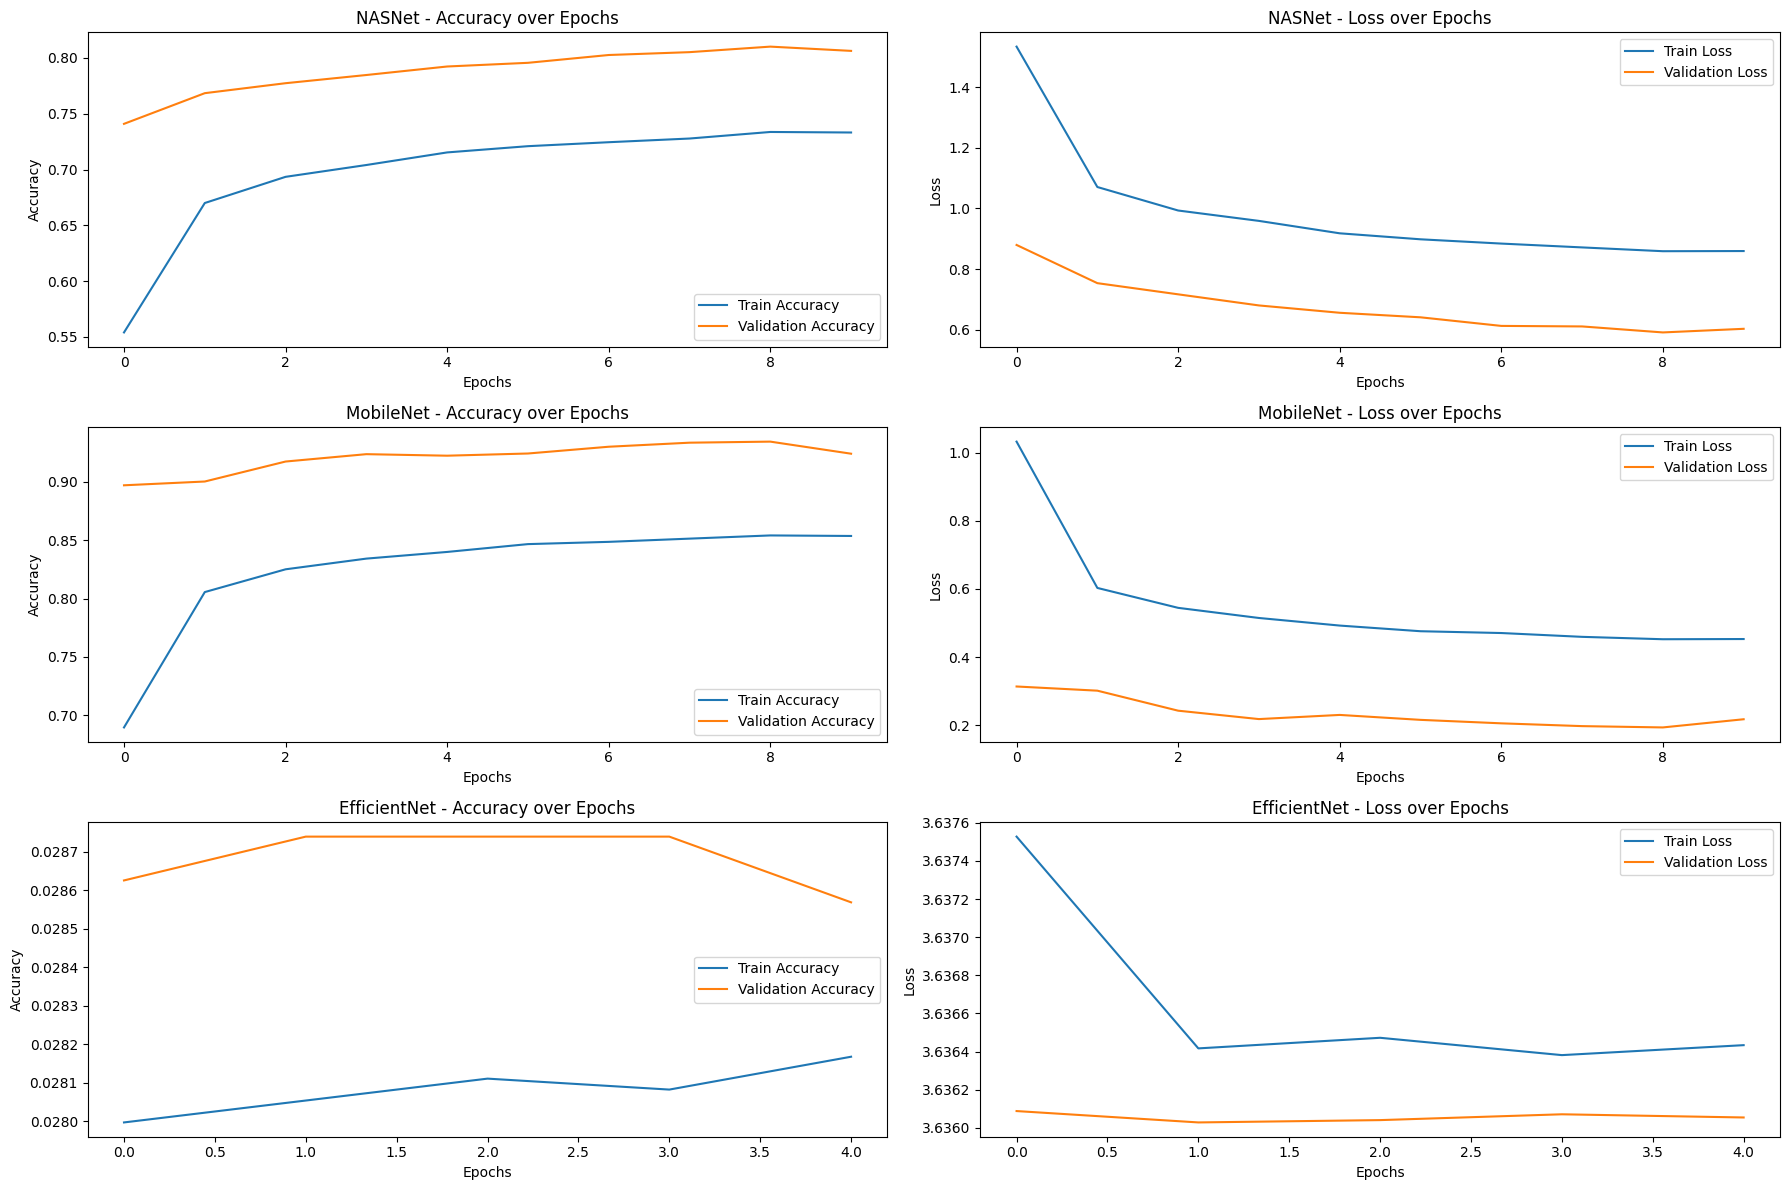

In [12]:
# Plot training results for all models
plt.figure(figsize=(18, 12))

for i, (model_name, history) in enumerate(history_dict.items()):
    plt.subplot(3, 2, i * 2 + 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(3, 2, i * 2 + 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


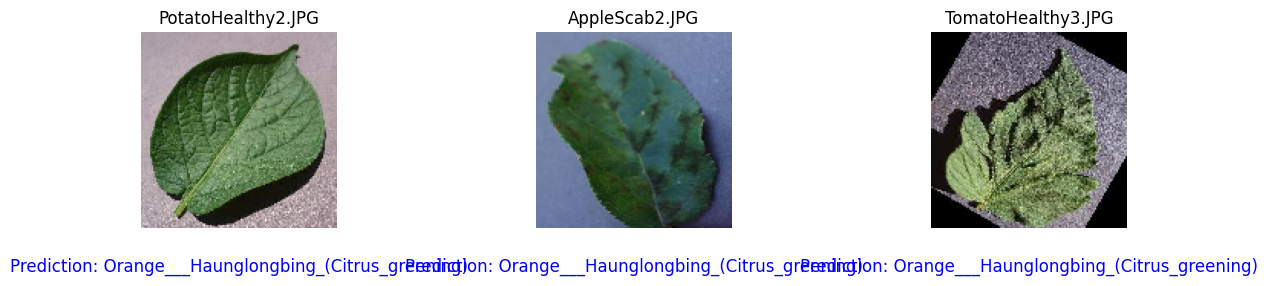

In [13]:
# Perform predictions using one of the models (e.g., EfficientNet)
selected_model_name = 'EfficientNet'
selected_model = models[selected_model_name]

plt.figure(figsize=(12, 6))

for i, img_name in enumerate(random_images):
    # Load and preprocess the image
    img_path = os.path.join(test_dir, img_name)
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values

    # Predict the class using the selected model
    prediction = selected_model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Get the class label from the class index
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    # Plot the image
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(img_name, fontsize=12)
    plt.axis('off')

    # Add prediction text below the image
    plt.text(0.5, -0.2, f'Prediction: {predicted_label}', ha='center', va='center', 
             transform=plt.gca().transAxes, fontsize=12, color='blue')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


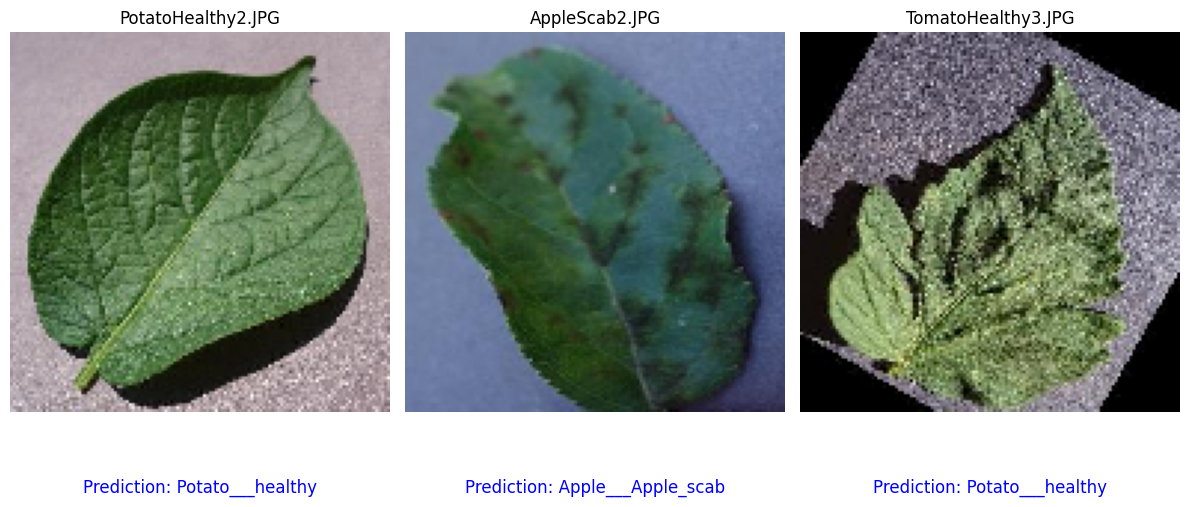

In [15]:
# Perform predictions using one of the models (e.g., EfficientNet)
selected_model_name = 'NASNet'
selected_model = models[selected_model_name]

plt.figure(figsize=(12, 6))

for i, img_name in enumerate(random_images):
    # Load and preprocess the image
    img_path = os.path.join(test_dir, img_name)
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values

    # Predict the class using the selected model
    prediction = selected_model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Get the class label from the class index
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    # Plot the image
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(img_name, fontsize=12)
    plt.axis('off')

    # Add prediction text below the image
    plt.text(0.5, -0.2, f'Prediction: {predicted_label}', ha='center', va='center', 
             transform=plt.gca().transAxes, fontsize=12, color='blue')

plt.tight_layout()
plt.show()